In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Grid for heatmap
x_vals = np.linspace(0, 10, 100)
z_vals = np.linspace(0, 10, 100)

# Widgets
n = widgets.IntSlider(min=1, max=10, step=1, value=2, description='# of Waves')
display(n)

# Columns for sliders
a_column = widgets.VBox()
ω_column = widgets.VBox()
k_column = widgets.VBox()
m_column = widgets.VBox()
sliders_box = widgets.HBox([a_column, ω_column, k_column, m_column])
display(sliders_box)

# Create sliders for each wave
def make_sliders(i):
    a = widgets.FloatSlider(min=0, max=10, step=0.01, value=1, description=f'a{i}')
    ω = widgets.FloatSlider(min=0, max=10, step=1, value=1, description=f'ω{i}')
    k = widgets.FloatSlider(min=0, max=10, step=1, value=1, description=f'k{i}')
    m = widgets.FloatSlider(min=0, max=10, step=1, value=1, description=f'm{i}')
    return {'a': a, 'ω': ω, 'k': k, 'm': m}

# Update sliders when n changes
line_sliders = []
def update_sliders(change=None):
    a_column.children = ()
    ω_column.children = ()
    k_column.children = ()
    m_column.children = ()
    line_sliders.clear()
    for i in range(n.value):
        sliders = make_sliders(i + 1)
        line_sliders.append(sliders)
        a_column.children += (sliders['a'],)
        ω_column.children += (sliders['ω'],)
        k_column.children += (sliders['k'],)
        m_column.children += (sliders['m'],)

n.observe(update_sliders, names='value')
update_sliders(None)

# Generate wave button
start_button = widgets.Button(description="Generate Wave")
display(start_button)

def start_animation(b):
    clear_output(wait=True)
    # Redisplay controls for possible adjustment
    display(n)
    display(sliders_box)
    display(start_button)

    # Setup figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(np.zeros((len(z_vals), len(x_vals))), cmap='coolwarm', vmin=-10, vmax=10, origin='lower',
                   extent=[x_vals.min(), x_vals.max(), z_vals.min(), z_vals.max()], aspect='auto')
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_title("Combined Wave Heatmap")
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('u(x,z,t) at y = 0')

    X, Z = np.meshgrid(x_vals, z_vals)

    # Animation update function
    def animate(frame):
        dt = 0.1
        current_t = frame * dt
        u = np.zeros_like(X)
        for sliders in line_sliders:
            a = sliders['a'].value
            ω = sliders['ω'].value
            k = sliders['k'].value
            m = sliders['m'].value
            u += a * np.sin(m * Z + k * X - ω * current_t)
        im.set_data(u)
        return [im]

    ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
    display(HTML(ani.to_jshtml()))
    

start_button.on_click(start_animation)


IntSlider(value=2, description='# of Waves', max=10, min=1)

Button(description='Generate Wave', style=ButtonStyle())

KeyError: 'm'

KeyError: 'm'

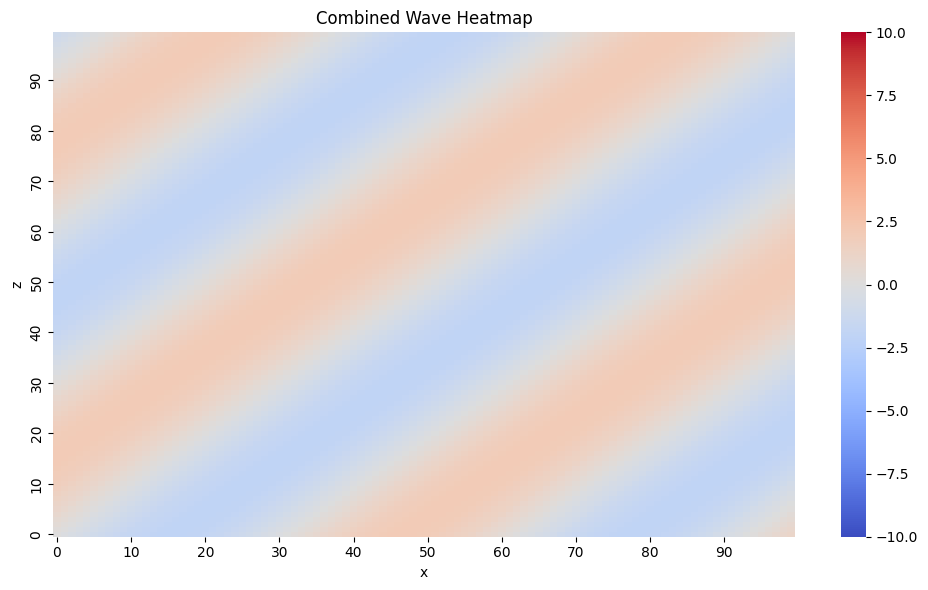

<IPython.core.display.Javascript object>

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets
from IPython.display import display, clear_output, DisplayHandle

# Grid for heatmap
x_vals = np.linspace(0, 10, 100)
t_vals = np.linspace(0, 10, 100)
x, t = np.meshgrid(x_vals, t_vals)

# Master controls
n = widgets.IntSlider(min=1, max=10, step=1, value=2, description='# of Waves')
v = widgets.FloatText(min=0.01, max=10, step=0.01, value=1, description='Velocity')
s = widgets.Checkbox(description='Sync By Velocity', value=False, indent=False)
master_box = widgets.HBox([n, v, s])
display(master_box)

# Columns for sliders
a_column = widgets.VBox()
ω_column = widgets.VBox()
k_column = widgets.VBox()
sliders_box = widgets.HBox([a_column, ω_column, k_column])
display(sliders_box)

# Create sliders for each wave
def make_sliders(i):
    a = widgets.FloatSlider(min=0, max=10, step=0.01, value=1, description=f'a{i}')
    ω = widgets.FloatSlider(min=0, max=10, step=1, value=1, description=f'ω{i}')
    k = widgets.FloatSlider(min=0, max=10, step=1, value=1, description=f'k{i}')
    sync = {'ω': False, 'k': False}

    def update_ω(change):
        if not s.value or sync['k']:
            return
        sync['ω'] = True
        k.value = ω.value / v.value if v.value != 0 else 0.01
        sync['ω'] = False

    def update_k(change):
        if not s.value or sync['ω']:
            return
        sync['k'] = True
        ω.value = k.value * v.value
        sync['k'] = False

    ω.observe(update_ω, names='value')
    k.observe(update_k, names='value')

    return {'a': a, 'ω': ω, 'k': k}

# Update sliders when n changes
line_sliders = []
def update_sliders(change=None):
    a_column.children = []
    ω_column.children = []
    k_column.children = []
    line_sliders.clear()
    for i in range(n.value):
        sliders = make_sliders(i + 1)
        line_sliders.append(sliders)
        a_column.children += (sliders['a'],)
        ω_column.children += (sliders['ω'],)
        k_column.children += (sliders['k'],)

n.observe(update_sliders, names='value')
update_sliders(None)

# Plotting combined heatmap
display_handle = DisplayHandle()
display_handle.display("")

def update_map(change=None):
    u = np.zeros_like(x)
    for sliders in line_sliders:
        a = sliders['a'].value
        ω = sliders['ω'].value
        k = sliders['k'].value
        u += a * np.sin(ω * t - k * x)

    fig, ax = plt.subplots(figsize=(10, 6))
    sb.heatmap(u, xticklabels=10, yticklabels=10, cmap='coolwarm', vmin=-10, vmax=10, ax=ax, cbar=True)
    ax.invert_yaxis()
    ax.set_title("Combined Wave Heatmap")
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    plt.tight_layout()
    display_handle.update(fig)
    plt.close(fig)

# Attach observers to all sliders
def attach_observers():
    for sliders in line_sliders:
        for key in ['a', 'ω', 'k']:
            sliders[key].observe(update_map, names='value')

# Full refresh to reattach everything
def refresher(change=None):
    update_sliders()
    attach_observers()
    update_map()

# Wire up main controls
n.observe(refresher, names='value')
v.observe(update_map, names='value')
s.observe(update_map, names='value')

# Initial attach and draw
attach_observers()
update_map()
